# Explore here

In [1]:
# Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')

In [10]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [31]:
data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [13]:
data.shape

(41188, 21)

In [14]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
data['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [16]:
data['y'].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

C:\Users\jorge\AppData\Local\Temp\ipykernel_39792\3923328321.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='Set2')


<Axes: xlabel='y', ylabel='count'>

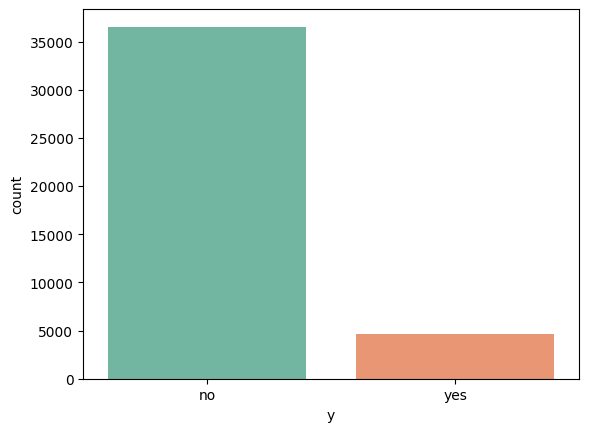

In [20]:
sns.countplot(x='y', data=data, palette='Set2')

In [21]:
data['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [22]:
data['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [23]:
data['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [24]:
data['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [25]:
data['housing'].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [26]:
data['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [27]:
data['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [28]:
data['month'].value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [29]:
data['day_of_week'].value_counts()

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

In [30]:
data['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

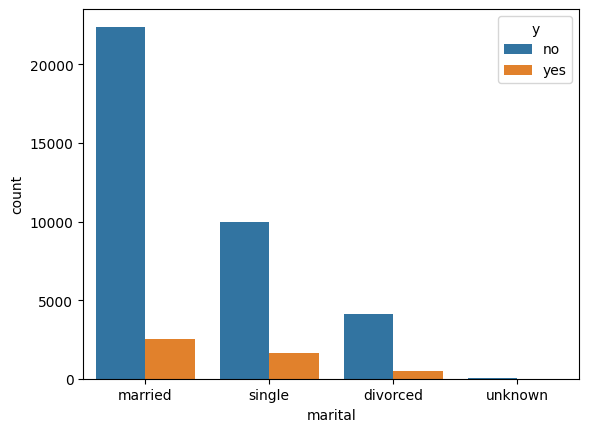

In [34]:
sns.countplot(x='marital', hue='y' , data=data)

<Axes: xlabel='housing', ylabel='count'>

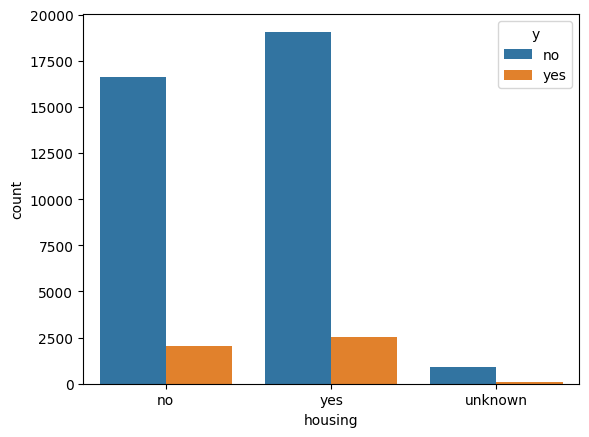

In [35]:
sns.countplot(x='housing', hue='y' , data=data)

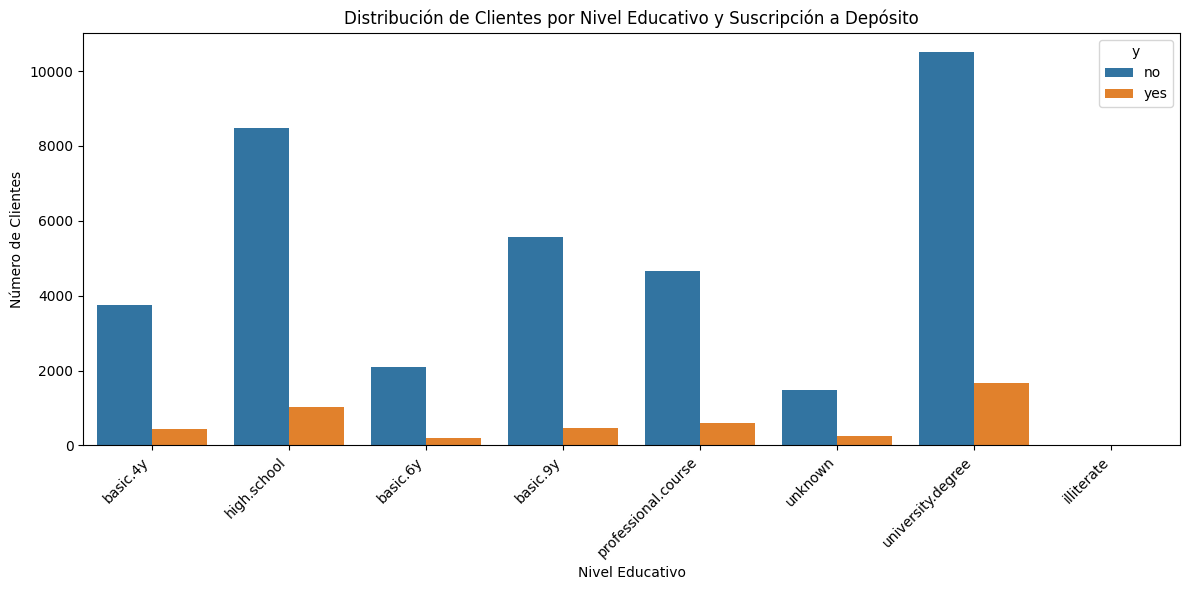

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='y', data=data)
plt.xticks(rotation=45, ha='right') 
plt.title('Distribución de Clientes por Nivel Educativo y Suscripción a Depósito')
plt.xlabel('Nivel Educativo')
plt.ylabel('Número de Clientes')
plt.tight_layout() 
plt.show()

<Axes: >

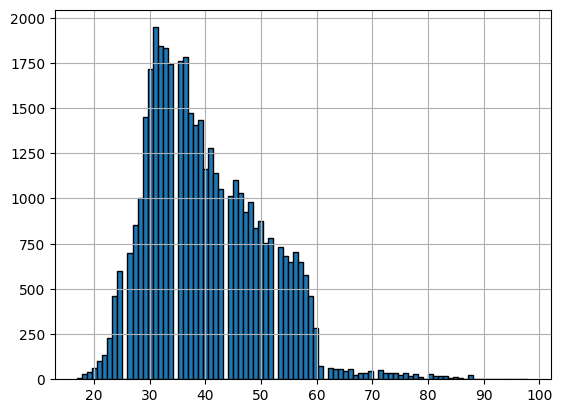

In [45]:
data['age'].hist(bins=90, edgecolor='black')

<Axes: >

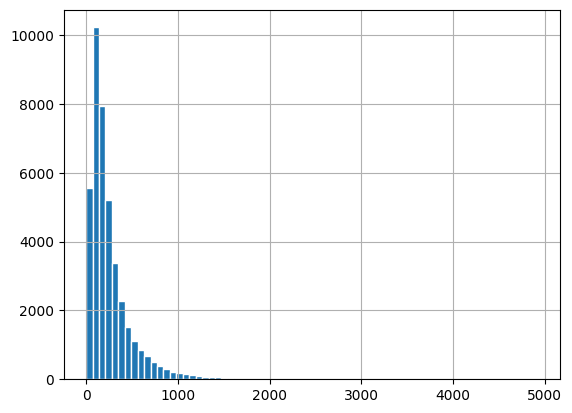

In [58]:
data['duration'].hist(bins=70, edgecolor='white')

<Axes: >

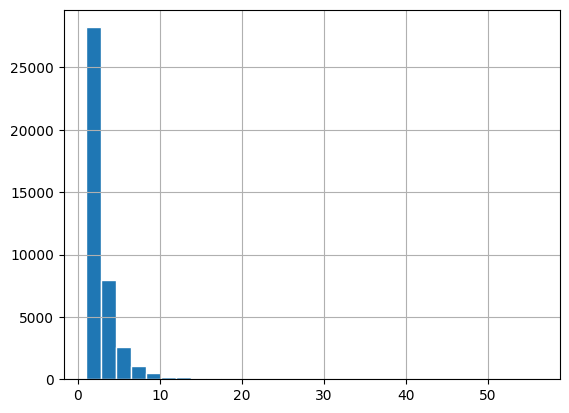

In [69]:
data['campaign'].hist(bins=30, edgecolor='white')

<Axes: >

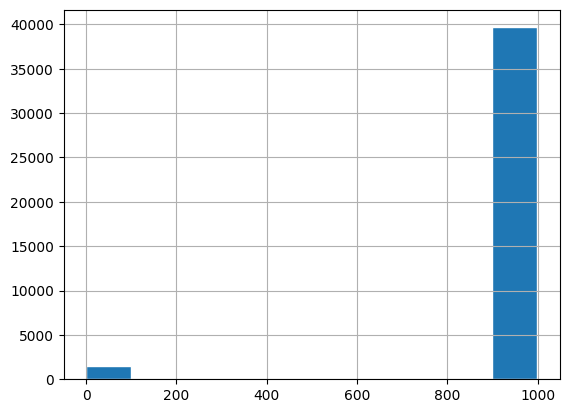

In [67]:
data['pdays'].hist(bins=10, edgecolor='white')

<Axes: >

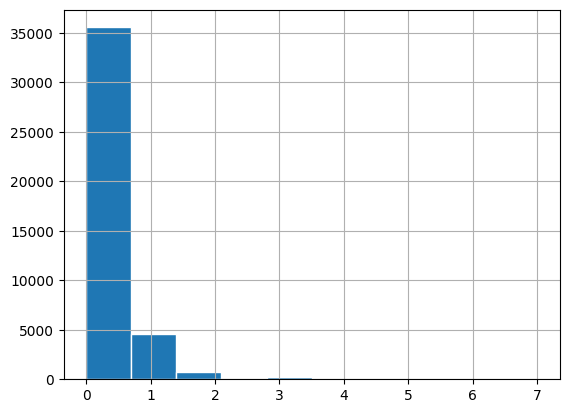

In [79]:
data['previous'].hist(bins=10, edgecolor='white')

<Axes: >

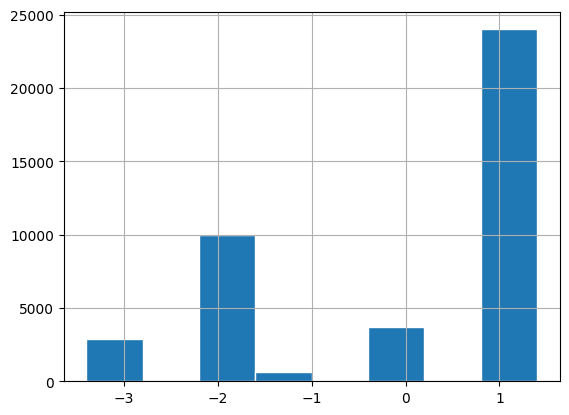

In [72]:
data['emp.var.rate'].hist(bins=8, edgecolor='white')

<Axes: >

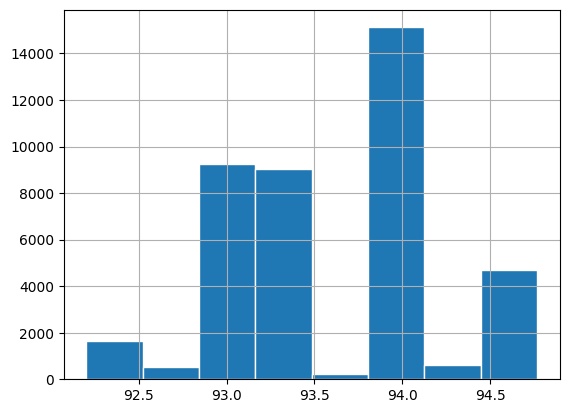

In [73]:
data['cons.price.idx'].hist(bins=8, edgecolor='white')

<Axes: >

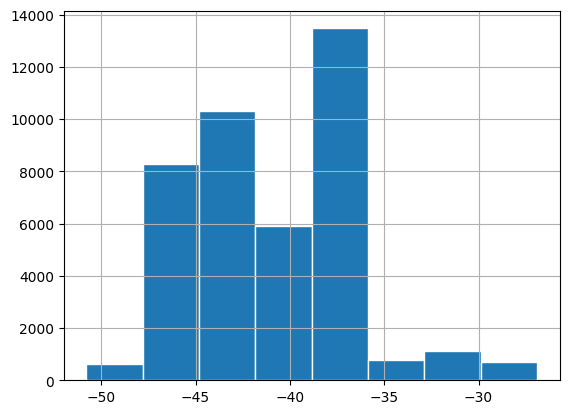

In [74]:
data['cons.conf.idx'].hist(bins=8, edgecolor='white')

<Axes: >

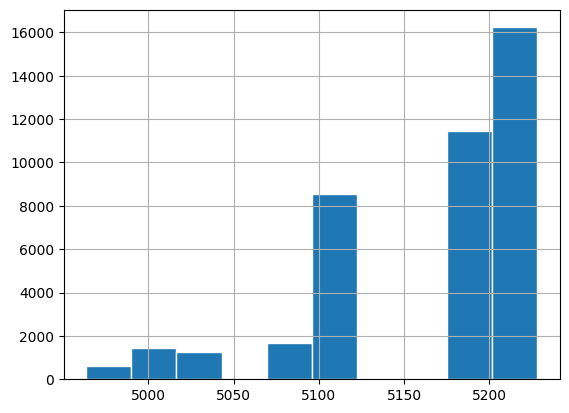

In [77]:
data['nr.employed'].hist(bins=10, edgecolor='white')

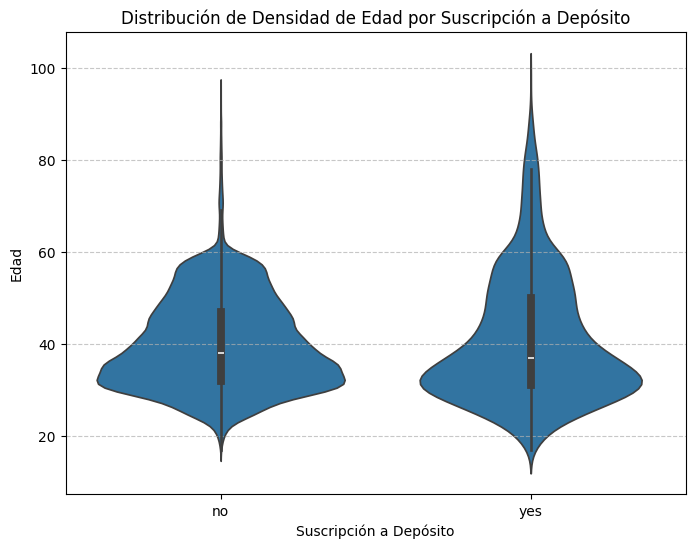

In [82]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='y', y='age', data=data)
plt.title('Distribución de Densidad de Edad por Suscripción a Depósito')
plt.xlabel('Suscripción a Depósito')
plt.ylabel('Edad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [90]:
data['y'] = data['y'].map({'no': 0, 'yes': 1})


In [92]:
categorical_cols = data.select_dtypes(include=['object']).columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('y')

In [93]:
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [94]:
numeric_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [95]:
if 'duration' in numeric_cols:
    numeric_cols = numeric_cols.drop('duration') # Remueve 'duration' para evitar data leakage si aplica a tu objetivo


In [96]:
data_processed = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [98]:
X = data_processed.drop('y', axis=1)
Y = data_processed['y']

In [104]:
scaler = StandardScaler()

cols_to_scale = [col for col in numeric_cols if col in X.columns]
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)

In [106]:
model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [110]:
predicciones = model.predict(X_test)
print(confusion_matrix(y_test, predicciones))

[[7147  163]
 [ 524  404]]


In [111]:
model.coef_

array([[-3.51274393e-03,  4.61074022e-03, -1.03568825e-01,
        -1.86487041e-01, -6.33470454e-02, -2.37680057e+00,
         9.60796894e-01,  5.09468450e-02,  8.91156529e-01,
        -8.17525401e-02, -2.73423035e-01, -1.91821695e-01,
        -4.22561759e-02, -1.95247545e-02,  3.29616596e-01,
        -2.12557507e-01, -1.42964977e-01,  1.47499893e-01,
        -2.68989989e-02, -8.24929542e-04,  8.68969551e-03,
        -1.87635027e-02,  4.92201459e-02,  8.44649946e-02,
         1.61387004e-01, -4.56770948e-02,  1.49933597e-02,
         1.57615495e-01,  5.99992161e-02,  1.58478614e-01,
         1.72814146e-01, -3.19498894e-01, -8.10774080e-03,
         3.06721396e-02, -3.15571247e-02,  3.06721396e-02,
        -3.05122431e-02, -6.15161191e-01,  6.75197217e-01,
         1.00909061e-01,  1.34615388e-01, -3.62449425e-01,
         1.73553215e+00, -5.27119148e-01, -5.46706100e-01,
        -7.54234160e-02,  8.58761249e-02, -1.34486761e-01,
        -4.94825634e-03,  2.21485917e-02,  1.31410839e-0